In [1]:
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("phones.csv")
data

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
...,...,...,...,...
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016


In [3]:
data.describe()

,disk,price,year
count,100.000000,100.000000,100.000000
mean,217.280000,8111.530000,2014.220000
std,193.812055,3540.401993,2.401935
min,16.000000,1435.000000,2010.000000
25%,64.000000,5349.250000,2013.000000
50%,128.000000,7890.500000,2015.000000
75%,512.000000,10358.250000,2016.000000
max,512.000000,15842.000000,2018.000000


In [4]:
data.describe(include=[object])

,os
count,100
unique,2
top,Android
freq,53


In [5]:
data.disk.value_counts().sort_index()

16     12
32     11
64     21
128     9
256    21
512    26
Name: disk, dtype: int64

In [6]:
data.eval('''
    is_ios     = (os == "iOS").astype("int")
    is_android = (os == "Android").astype("int")
''', inplace=True)
data

,disk,os,price,year,is_ios,is_android
0,64,Android,7256,2016,0,1
1,128,Android,7623,2015,0,1
2,64,Android,1916,2010,0,1
3,512,iOS,15045,2017,1,0
4,16,Android,4478,2013,0,1
...,...,...,...,...,...,...
95,512,iOS,8398,2011,1,0
96,64,Android,7197,2016,0,1
97,32,Android,5694,2014,0,1
98,32,Android,7589,2016,0,1


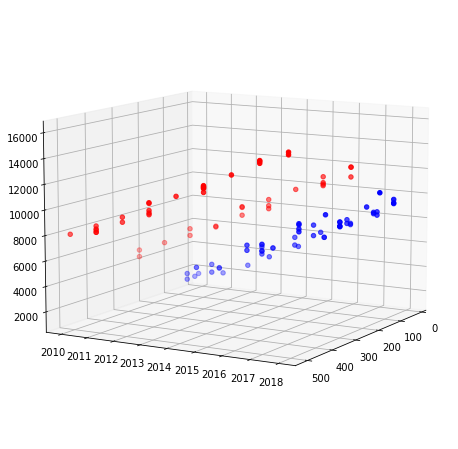

In [7]:
androids = data.query("is_android == 1")
iphones = data.query("is_ios == 1")

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection="3d")
ax.scatter(xs=androids.disk, ys=androids.year, zs=androids.price, c="b");
ax.scatter(xs=iphones.disk, ys=iphones.year, zs=iphones.price, c="r");

ax.view_init(10, 30)

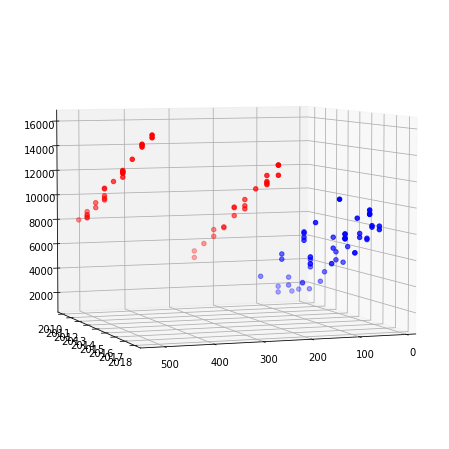

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection="3d")
ax.scatter(xs=androids.disk, ys=androids.year, zs=androids.price, c="b");
ax.scatter(xs=iphones.disk, ys=iphones.year, zs=iphones.price, c="r");

ax.view_init(5, 70)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression().fit(data[["disk", "year", "is_ios", "is_android"]], data["price"])

In [11]:
Y_pred = model.predict(data[["disk", "year", "is_ios", "is_android"]][:10])
Y_pred

array([ 7664.43620643,  7316.34382022,  1588.92592837, 14728.54488443,
        4128.3115723 , 15741.12993078,  7316.34382022,  4626.6810674 ,
       12703.37479175,  6651.85116008])

In [12]:
Y = data["price"][:10]
Y

0     7256
1     7623
2     1916
3    15045
4     4478
5    15842
6     7191
7     4277
8    12797
9     6256
Name: price, dtype: int64

In [13]:
Y_pred - Y

0    408.436206
1   -306.656180
2   -327.074072
3   -316.455116
4   -349.688428
5   -100.870069
6    125.343820
7    349.681067
8    -93.625208
9    395.851160
Name: price, dtype: float64

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_pred, Y)

90388.7945877021

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(data[["disk", "price"]], data[["is_ios", "year"]])

In [16]:
model.predict(data[0:10][["disk", "price"]]) == data[:10][["is_ios", "year"]]

,is_ios,year
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [17]:
model.feature_importances_

array([0.36714545, 0.63285455])

In [18]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(3).fit(data[["disk"]])

In [20]:
model.predict(data.query("(disk == 512)")[["disk"]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [21]:
model.predict(data.query("disk == 256")[["disk"]])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [22]:
model.predict(data.query("is_android")[["disk"]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)